## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [8]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.9 MB/s eta 0:00:00


1.2 라이브러리 설정

In [9]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [10]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [12]:
subreddit_name = 'stocks'
search_query = 'NVIDIA OR NVDA'
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')


2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [13]:
# 이전 코드 실행해야 제대로 실행됨
df = pd.DataFrame(columns=['title', 'text'])
post_data = []

for post in top_posts:
    post_data.append({'title': post.title, 'text': post.selftext})

df = pd.concat([df, pd.DataFrame(post_data)], ignore_index=True)
df

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



,title,text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
230,"Here is a Market Recap for today Thursday, Nov...","**PsychoMarket Recap - Thursday, November 18, ..."
231,TSMC sales grow 45% in July on strong AI chip ...,(Bloomberg) -- Taiwan Semiconductor Manufactur...
232,"META Still The Cheapest of The Magnificent 7, ...",Quick glance at some of the numbers for META. ...
233,Made 30% since I started trading 7 months ago ...,"Hello folks, \n\nI am a 24 year old who starte..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [14]:
# 토큰화.  apply이용해서 각 열에 토근화 실시함
word_tokenize_text = df['text'].apply(word_tokenize)
word_tokenize_text
print(word_tokenize_text)

word_tokenize_title = df['title'].apply(word_tokenize)
word_tokenize_title
print(word_tokenize_title)

0      [As, the, Fed, caused, a, bit, of, a, ripple, ...
1      [Lately, I, keep, hearing, the, same, old, nar...
2      [[, Full, Article, ], (, https, :, //www.msn.c...
3      [I, understand, that, most, people, in, this, ...
4      [#, #, #, *, *, Abbreviation, Index, :, *, *, ...
                             ...                        
230    [*, *, PsychoMarket, Recap, -, Thursday, ,, No...
231    [(, Bloomberg, ), --, Taiwan, Semiconductor, M...
232    [Quick, glance, at, some, of, the, numbers, fo...
233    [Hello, folks, ,, I, am, a, 24, year, old, who...
234    [This, is, a, pretty, long, article, ,, but, I...
Name: text, Length: 235, dtype: object
0      [A, note, to, young, investors, (, or, new, in...
1      [To, all, of, you, who, are, red, this, year, ...
2      [Pelosi, 's, husband, buying, over, $, 1, mill...
3       [Beware, of, what, AMC, shorts, are, holding, !]
4                    [Blackberry, --, A, Dormant, Giant]
                             ...                 

In [15]:
# 불용어 제거
stop_words_list = stopwords.words('english')
# NLTK에서 정의한 영어 불용어 리스트확인
print('불용어 개수 :', len(stop_words_list))
print('불용어 12개 출력:', stop_words_list[:12])
print('-'*100)

stop_words = set(stopwords.words('english'))
word_tokenize_text = word_tokenize_text.apply(lambda x: [word for word in x if word.lower() not in stop_words])
word_tokenize_title = word_tokenize_title.apply(lambda x: [word for word in x if word.lower() not in stop_words])
print('text:',word_tokenize_text)
print('-'*100)
print('title:',word_tokenize_title)
print('-'*100)

# 특수문자 string.punctuation 을 이용해서 제거
import string
word_tokenize_text = word_tokenize_text.apply(lambda x: [word for word in x if word not in string.punctuation])
word_tokenize_title = word_tokenize_title.apply(lambda x: [word for word in x if word not in string.punctuation])
print('text:',word_tokenize_text)
print('-'*100)
print('title:',word_tokenize_title)


불용어 개수 : 179
불용어 12개 출력: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll"]
----------------------------------------------------------------------------------------------------
text: 0      [Fed, caused, bit, ripple, market, today, cons...
1      [Lately, keep, hearing, old, narrative, beat-d...
2      [[, Full, Article, ], (, https, :, //www.msn.c...
3      [understand, people, thread, invest, safely, n...
4      [#, #, #, *, *, Abbreviation, Index, :, *, *, ...
                             ...                        
230    [*, *, PsychoMarket, Recap, -, Thursday, ,, No...
231    [(, Bloomberg, ), --, Taiwan, Semiconductor, M...
232    [Quick, glance, numbers, META, ., EPS, crazy, ...
233    [Hello, folks, ,, 24, year, old, started, work...
234    [pretty, long, article, ,, think, important, r...
Name: text, Length: 235, dtype: object
----------------------------------------------------------------------------------------------------
ti

In [16]:
#text의 워드클라우드 나타내니, http 등 도메인단어가 많이 나와서 임의로 설정해서 다시 전처리
word_tokenize_text = word_tokenize_text.apply(lambda x: [word for word in x if word not in ['<','>','http','www','com','https',"'",'S','//','"','|',"'s"]])
word_tokenize_title = word_tokenize_title.apply(lambda x: [word for word in x if word not in ['<','>','http','www','com','https',"'",'S','//','"','|',"'s"]])

2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

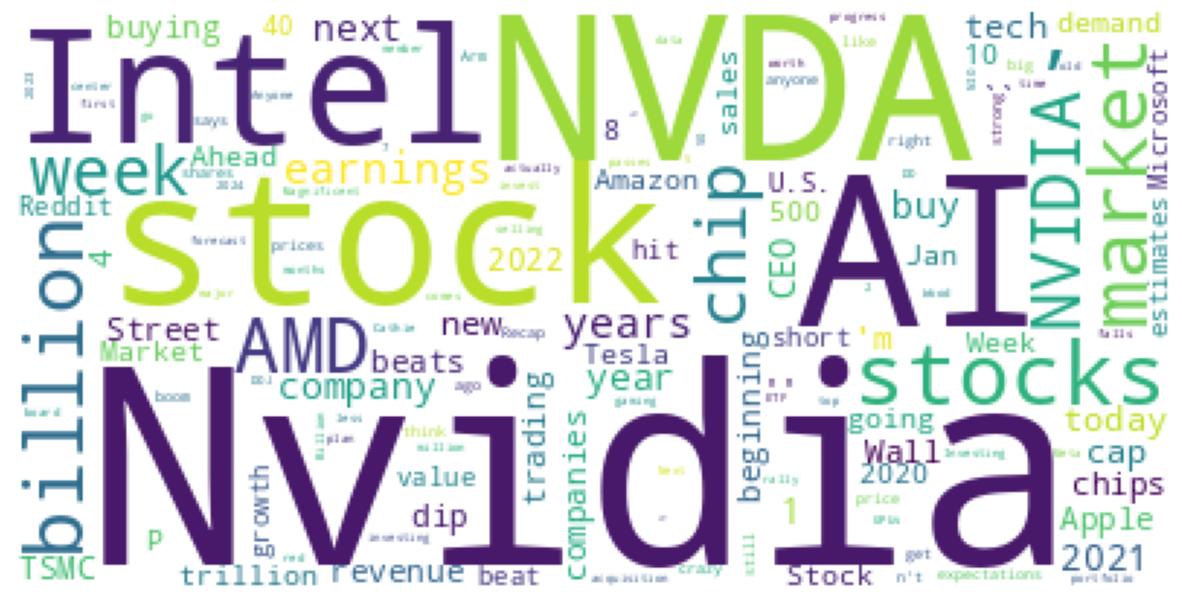

In [17]:
# title의 wordcloud
all_title_cloud = ' '.join([' '.join(title_tokens) for title_tokens in word_tokenize_title])

wordcloud = WordCloud(
    background_color='white'
).generate_from_frequencies(Counter(all_title_cloud.split()))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(-0.5, 399.5, 199.5, -0.5)

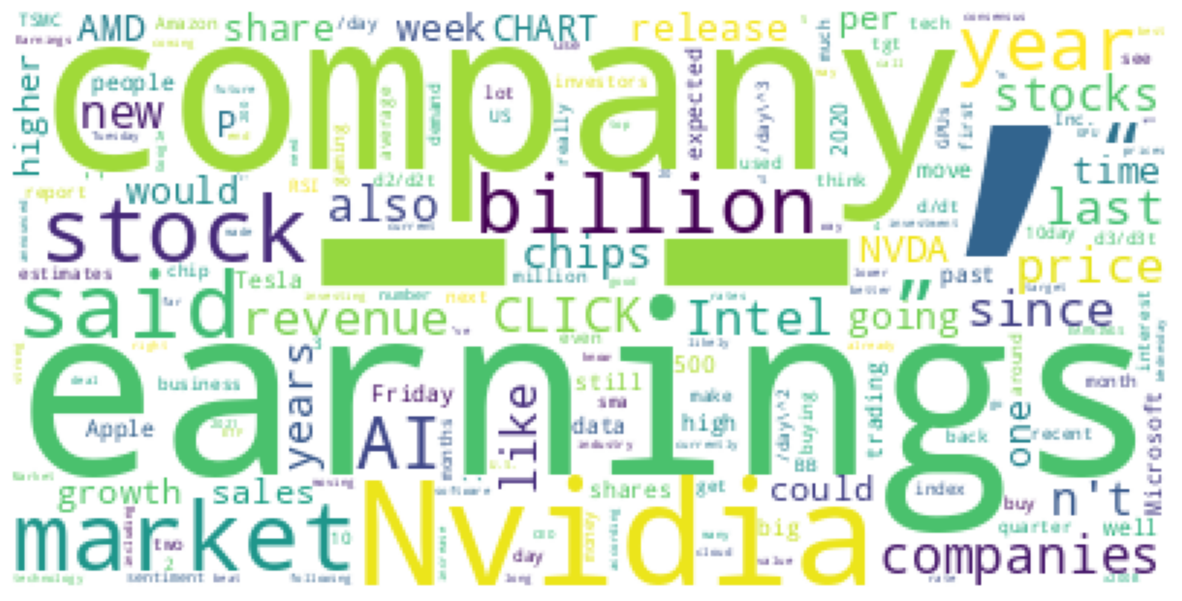

In [18]:
# text의 wordcloud
all_text_cloud = ' '.join([' '.join(text_tokens) for text_tokens in word_tokenize_text])

wordcloud = WordCloud(
    background_color='white'
).generate_from_frequencies(Counter(all_text_cloud.split()))

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')

# 임의로 도메인단어들 지웠지만 제대로 안지워짐...

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

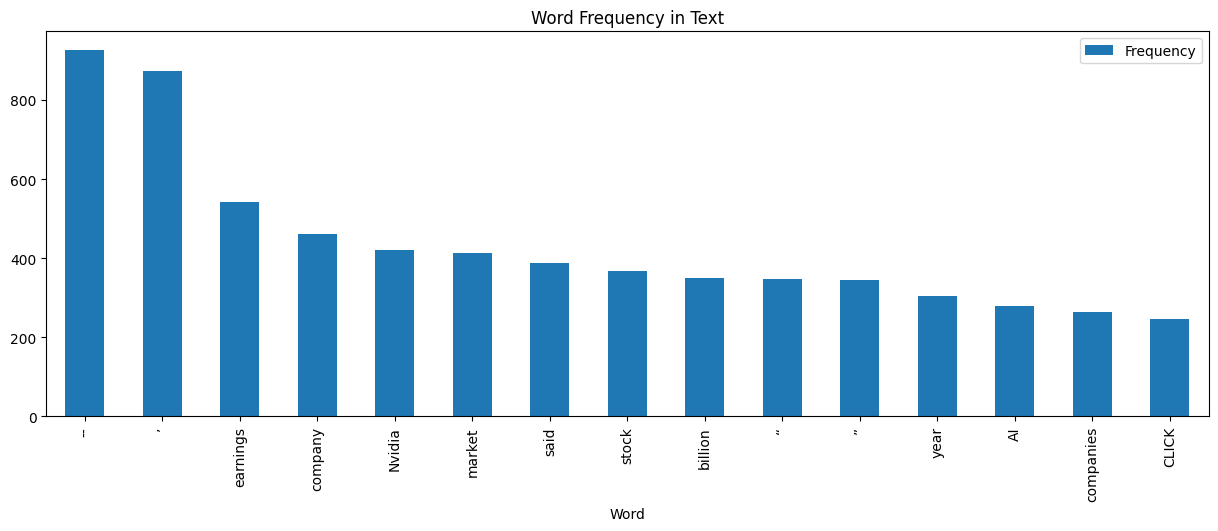

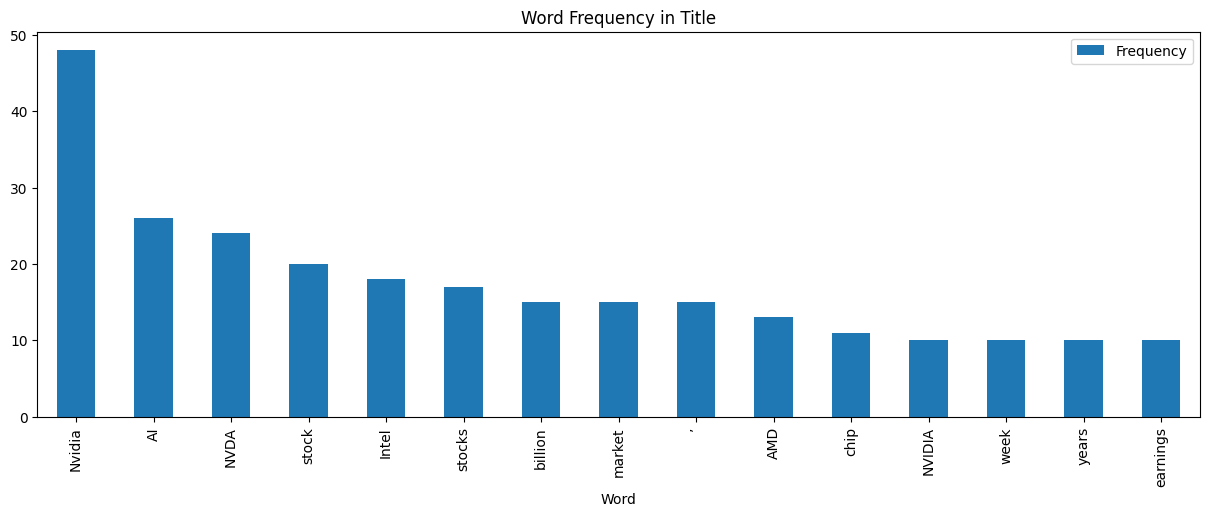

In [19]:
text_bar = Counter(all_text_cloud.split())
title_bar = Counter(all_title_cloud.split())

df_text = pd.DataFrame(text_bar.items(), columns=['Word', 'Frequency'])
df_title = pd.DataFrame(title_bar.items(), columns=['Word', 'Frequency'])

#빈도수 내림차순 정렬
df_text = df_text.sort_values('Frequency', ascending=False)
df_title = df_title.sort_values('Frequency', ascending=False)


df_text[:15].plot(x='Word', y='Frequency', kind='bar', figsize=(15, 5))
plt.title('Word Frequency in Text')
plt.show()

df_title[:15].plot(x='Word', y='Frequency', kind='bar', figsize=(15, 5))
plt.title('Word Frequency in Title')
plt.show()

#특수문자가 남아있는게 아쉽다

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

<Axes: title={'center': 'Analysis of NVIDIA Posts'}, ylabel='count'>

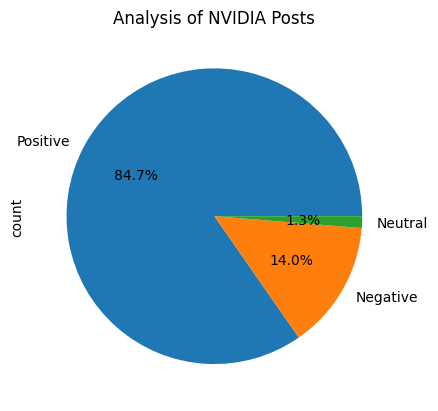

In [25]:
#NVIDIA 감정분석

from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

df['sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

sentiment_counts = df['sentiment_label'].value_counts()
sentiment_counts.plot(kind='pie', title='Analysis of NVIDIA Posts', autopct='%1.1f%%')
